# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json as json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


url = "http://api.openweathermap.org/data/2.5/weather?appid=0d08497097f09f114eca47bcedc7e857&q=Chicago&units=Imperial"

#query_url = f"{base_url}appid={weather_api_key}&q="Chicago"&units={units}"
response = requests.get(url).json()    
print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
lat = []
lon = []
temp = []
temp_max = []
humid = []
cover = []
wind = []
found = []

f = 0

for i in range(len(cities)):
    #if f < 50:
        print(f"Processing request: {i} for city: {cities[i]}")
        query_url = f"{base_url}appid={weather_api_key}&q={cities[i]}&units={units}"
        try:
            response = requests.get(query_url).json()          
        except KeyError:
            #high level key failure
            print(f"No data returned for city: {cities[i]}")
            #f+= 1
        except:
            #some rando failure
            print(f"No data returned for city: {cities[i]}")
            #f+= 1  
        else:
            #if any attribute is missing stop working it and ditch the city
            try:
                lat.append(response['coord']['lat'])
                try:
                    lon.append(response['coord']['lon'])
                    try:
                        temp.append(response['main']['temp'])
                        try: 
                            temp_max.append(response['main']['temp_max'])
                            try:
                                humid.append(response['main']['humidity'])
                                try:
                                    cover.append(response['clouds']['all'])
                                    try:
                                        wind.append(response['wind']['speed'])
                                        found.append({cities[i]})
                                    except KeyError:
                                        print(f"No wind returned for city: {cities[i]}")                                
                                except KeyError:
                                    print(f"No cloud cover returned for city: {cities[i]}")
                            except KeyError:
                                print(f"No humidity returned for city: {cities[i]}")   
                        except KeyError:
                            print(f"No max temp returned for city: {cities[i]}")                            
                    except KeyError:
                        print(f"No temperature returned for city: {cities[i]}")
                except KeyError:
                    print(f"No longitude returned for city: {cities[i]}")
            except KeyError:
                print(f"No latitude returned for city: {cities[i]}")

            #f += 1


Processing request: 0 for city: puerto ayora
Processing request: 1 for city: chuy
Processing request: 2 for city: new norfolk
Processing request: 3 for city: artyk
No latitude returned for city: artyk
Processing request: 4 for city: port elizabeth
Processing request: 5 for city: avarua
Processing request: 6 for city: georgetown
Processing request: 7 for city: bektemir
Processing request: 8 for city: vaini
Processing request: 9 for city: ribeira grande
Processing request: 10 for city: ushuaia
Processing request: 11 for city: cockburn town
Processing request: 12 for city: hambantota
Processing request: 13 for city: mar del plata
Processing request: 14 for city: port alfred
Processing request: 15 for city: hilo
Processing request: 16 for city: bolungarvik
No latitude returned for city: bolungarvik
Processing request: 17 for city: alyangula
Processing request: 18 for city: tasiilaq
Processing request: 19 for city: airai
Processing request: 20 for city: rikitea
Processing request: 21 for ci

Processing request: 174 for city: puerto madryn
Processing request: 175 for city: bredasdorp
Processing request: 176 for city: pimentel
Processing request: 177 for city: neryungri
Processing request: 178 for city: victor harbor
Processing request: 179 for city: marsa matruh
Processing request: 180 for city: jumla
Processing request: 181 for city: carnarvon
Processing request: 182 for city: nara
Processing request: 183 for city: yamada
Processing request: 184 for city: marzuq
Processing request: 185 for city: isangel
Processing request: 186 for city: ixtapa
Processing request: 187 for city: bima
Processing request: 188 for city: west wendover
Processing request: 189 for city: emerald
Processing request: 190 for city: labuhan
Processing request: 191 for city: beringovskiy
Processing request: 192 for city: sitka
Processing request: 193 for city: stekolnyy
No latitude returned for city: stekolnyy
Processing request: 194 for city: pangnirtung
Processing request: 195 for city: nakonde
Proces

Processing request: 343 for city: chernyshevskiy
Processing request: 344 for city: digha
Processing request: 345 for city: thibodaux
Processing request: 346 for city: linqiong
Processing request: 347 for city: laurel
Processing request: 348 for city: moron
Processing request: 349 for city: bengkulu
Processing request: 350 for city: sorland
Processing request: 351 for city: fredericton
Processing request: 352 for city: rungata
No latitude returned for city: rungata
Processing request: 353 for city: amboasary
Processing request: 354 for city: dharmabad
Processing request: 355 for city: taltal
Processing request: 356 for city: rawannawi
No latitude returned for city: rawannawi
Processing request: 357 for city: barcelos
Processing request: 358 for city: bilibino
Processing request: 359 for city: kamenskoye
No latitude returned for city: kamenskoye
Processing request: 360 for city: navlya
Processing request: 361 for city: hami
Processing request: 362 for city: rohnert park
Processing reques

Processing request: 521 for city: grindavik
Processing request: 522 for city: sterling
Processing request: 523 for city: los llanos de aridane
Processing request: 524 for city: mount isa
Processing request: 525 for city: bur gabo
No latitude returned for city: bur gabo
Processing request: 526 for city: aromashevo
Processing request: 527 for city: aleysk
Processing request: 528 for city: kruisfontein
Processing request: 529 for city: sioux lookout
Processing request: 530 for city: olinda
Processing request: 531 for city: jacareacanga
Processing request: 532 for city: avera
Processing request: 533 for city: lakatoro
Processing request: 534 for city: gejiu
Processing request: 535 for city: tenenkou
Processing request: 536 for city: tura
Processing request: 537 for city: verkhoyansk
Processing request: 538 for city: terney
Processing request: 539 for city: morehead
Processing request: 540 for city: omboue
Processing request: 541 for city: sulangan
Processing request: 542 for city: bokspits

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, lon, temp, humid, cover and wind
weather_dict = {
    "city": found,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "max_temp": temp_max,
    "humid": humid,
    "cover": cover,
    "wind": wind}    

cities_df = pd.DataFrame(weather_dict)
# save the API data to file
cities_df.to_csv("output_data/cities.csv", index=False, header=True)

In [5]:
#cities_df.at[3, 'humid'] = 101
cities_df.head()

,city,lat,lon,temp,max_temp,humid,cover,wind
0,{puerto ayora},-0.7393,-90.3518,72.55,76.96,82,52,5.99
1,{chuy},-33.6971,-53.4616,58.51,58.51,94,100,10.49
2,{new norfolk},-42.7826,147.0587,41.04,44.74,84,28,2.84
3,{port elizabeth},-33.9180,25.5701,54.10,54.10,82,93,8.90
4,{avarua},-21.2078,-159.7750,77.05,77.05,69,75,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.count()

city        541
lat         541
lon         541
temp        541
max_temp    541
humid       541
cover       541
wind        541
dtype: int64

In [7]:
#  Get the indices of cities that have humidity over 100%.
index = cities_df.index
too_humid = cities_df["humid"] > 100
too_humid_index = index[too_humid]
print(too_humid_index)

Int64Index([], dtype='int64')


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cool_cities_df = cities_df.drop(too_humid_index, inplace=False)

In [11]:
cool_cities_df.count()

city        541
lat         541
lon         541
temp        541
max_temp    541
humid       541
cover       541
wind        541
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

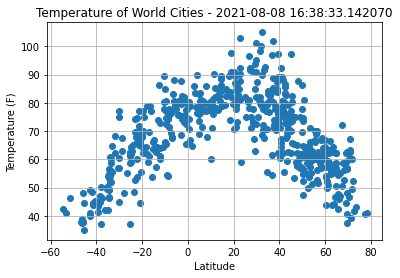

In [12]:
# Current date time in local system
current_dt = datetime.now()

plt.scatter(cool_cities_df["lat"], cool_cities_df["temp"], marker="o")

# titles, etc.
title = f"Temperature of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperatureofWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

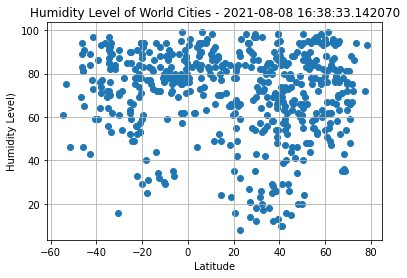

In [13]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["humid"], marker="o")

# titles, etc.
title = f"Humidity Level of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Humidity Level)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumidityofWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

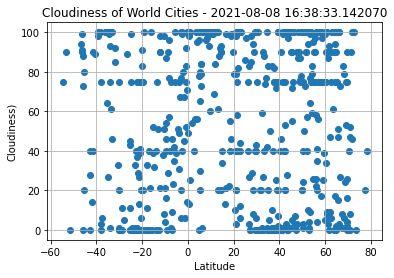

In [14]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["cover"], marker="o")

# titles, etc.
title = f"Cloudiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Cloudiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessofWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

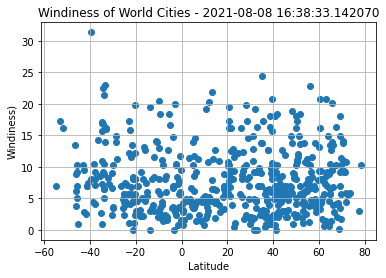

In [15]:
plt.scatter(cool_cities_df["lat"], cool_cities_df["wind"], marker="o")

# titles, etc.
plt.title("Windiness of World Cities")
title = f"Windiness of World Cities - {current_dt}"
plt.title(title)
plt.ylabel("Windiness)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindinessofWorldCities.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between latitude and temperature is -0.67
The r-squared is: 0.4449813706377787


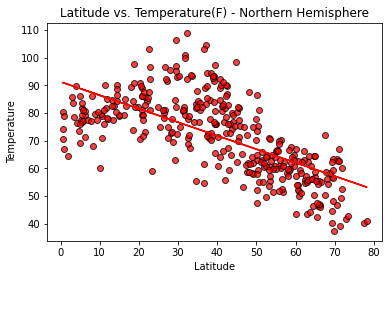

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and max temp for the Cities in the northern hemispere
# first split into northern and southern latitudes
north_lat = cities_df.loc[(cities_df["lat"] >= 0)]["lat"]
south_lat = cities_df.loc[(cities_df["lat"] < 0)]["lat"]

north_temp =  cities_df.loc[(cities_df["lat"] >= 0)]["max_temp"]

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(north_lat,north_temp)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Temperature(F) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(north_lat,north_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between latitude and temperature is 0.84
The r-squared is: 0.7025681523143504


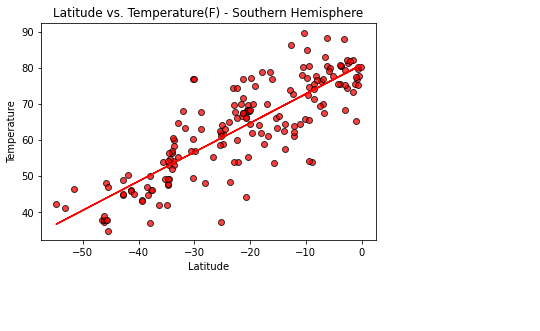

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and max temp for the Cities in the southern hemispere

south_temp =  cities_df.loc[(cities_df["lat"] < 0)]["max_temp"]

print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(south_lat,south_temp)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Temperature(F) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(south_lat,south_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and humidity is -0.03
The r-squared is: 0.0006355031304946363


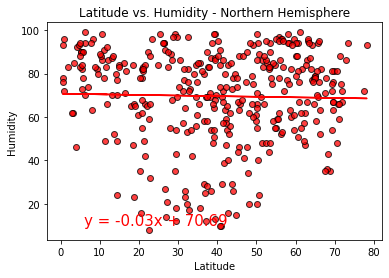

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and humidity for the Cities in the northern hemispere

north_humid =  cities_df.loc[(cities_df["lat"] >= 0)]["humid"]

print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(north_lat,north_humid)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(north_lat,north_humid, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and humidity is 0.02
The r-squared is: 0.00044251747105566465


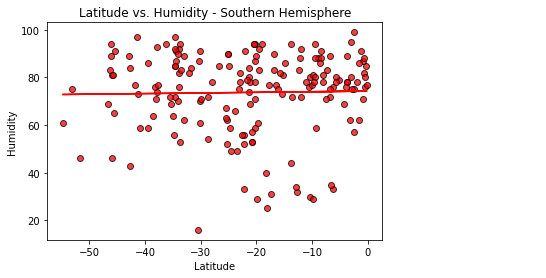

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and humidity for the Cities in the southern hemispere

south_humid =  cities_df.loc[(cities_df["lat"] < 0)]["humid"]

print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(south_lat,south_humid)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(south_lat,south_humid, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and cloudiness is -0.1
The r-squared is: 0.009910125268177266


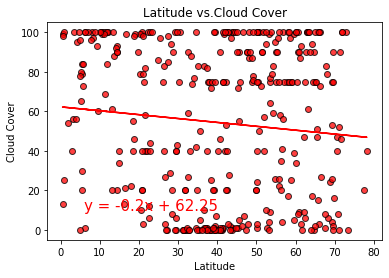

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and cloud cover for the Cities in the northern hemisphere

north_cover =  cities_df.loc[(cities_df["lat"] >= 0)]["cover"]

print(f"The correlation coefficient between latitude and cloudiness is {round(st.pearsonr(north_lat,north_cover)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_cover)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs.Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.scatter(north_lat,north_cover, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between latitude and cloudiness is -0.1
The r-squared is: 0.009910125268177266


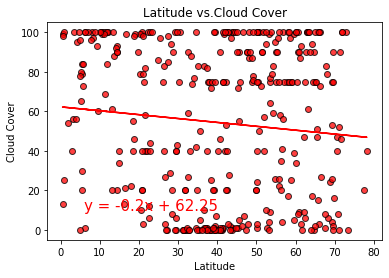

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and cloud cover for the Cities in the southern hemisphere

north_cover =  cities_df.loc[(cities_df["lat"] >= 0)]["cover"]

print(f"The correlation coefficient between latitude and cloudiness is {round(st.pearsonr(north_lat,north_cover)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_cover)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs.Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")
plt.scatter(north_lat,north_cover, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between latitude and wind speed is 0.06
The r-squared is: 0.0040092793426015115


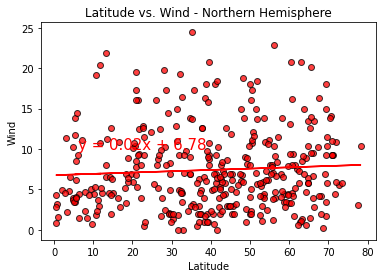

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and wind speed for the Cities

north_wind =  cities_df.loc[(cities_df["lat"] >= 0)]["wind"]

print(f"The correlation coefficient between latitude and wind speed is {round(st.pearsonr(north_lat,north_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Wind - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.scatter(north_lat,north_wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between latitude and wind speed is -0.2
The r-squared is: 0.03943533301943627


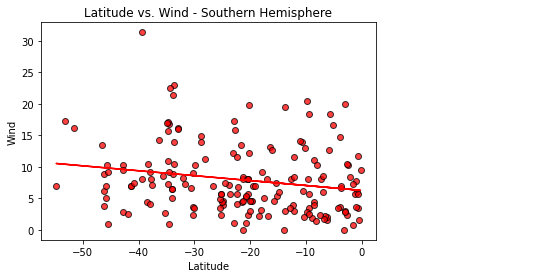

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for latitude and wind speed for the Cities in the southern hemsphere

south_wind =  cities_df.loc[(cities_df["lat"] < 0)]["wind"]

print(f"The correlation coefficient between latitude and wind speed is {round(st.pearsonr(south_lat,south_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Latitude vs. Wind - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.scatter(south_lat,south_wind, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")